# CReM - chemically reasonable mutations

CReM: chemically reasonable mutations framework for structure generation
Pavel Polishchuk
Journal of Cheminformatics 2020, 12, (1), 28
https://doi.org/10.1186/s13321-020-00431-w

## Installation

### From pypi package

In [ ]:
#pip install crem

## Precompiled fragment databases

The links to download precompiled fragment databases will be published at - http://www.qsar4u.com/pages/crem.php
<br>Download a fragment DB or create a new one and link it to "crem_db_file ="

## Structure generation

Import necessary functions from the main module

In [5]:
from rdkit import Chem
from crem.crem import mutate_mol, grow_mol, link_mols
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolops import RemoveHs
from rdkit.Chem import Draw

def get_matching_atoms(mol_in, smarts):
    pat = Chem.MolFromSmarts(smarts)
    return [x[0] for x in mol_in.GetSubstructMatches(pat)]

mol_list = []
crem_db_file = './data/replacements_sc2.5.db'

Define a molecule of interest

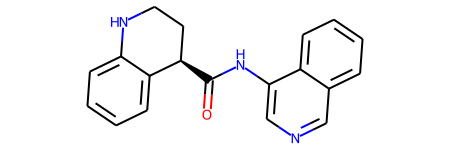

In [6]:
frag_smi = "O=C(Nc1cncc2ccccc12)[C@@H]1CCNc2ccccc21" #COVID Moonshot molecule
frag_mol = Chem.MolFromSmiles(frag_smi)
AllChem.Compute2DCoords(frag_mol)
frag_mol

### Growing

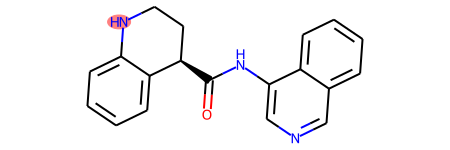

In [7]:
#Define where to grow with a SMARTS pattern
growing_vectors = get_matching_atoms(frag_mol,"[NX3;H2,H1;!$(NC=O)]")
frag_mol

In [8]:
#Define the growing size with "max_atoms=" and grow with a predefine list of fragment
grow_list = list(grow_mol(frag_mol, db_name=crem_db_file, max_atoms=15, replace_ids=growing_vectors,return_mol=True))
mol_list = [RemoveHs(x[1]) for x in grow_list]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,frag_mol) for m in mol_list]
print(len(mol_list)) #Gives you the number of generated molecules

22


RDKit WARNING: [13:01:03] WARNING: not removing hydrogen atom with dummy atom neighbors


In [9]:
#Convert rdkit mol to smi
smi_list = []
for mol in mol_list:
    mol_smi = Chem.MolToSmiles(mol)
    smi_list.append(mol_smi)

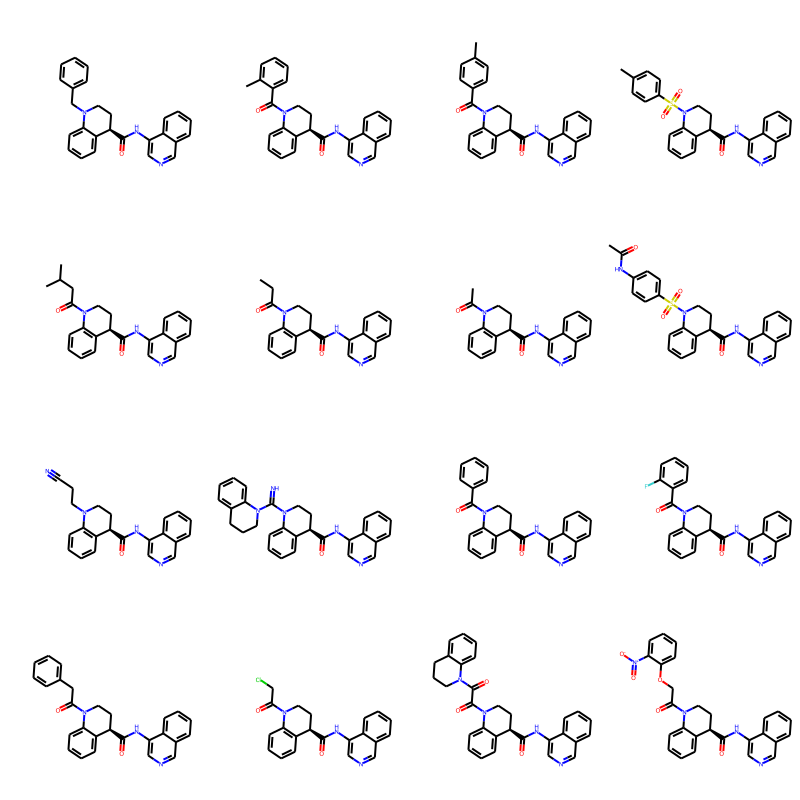

In [10]:
#Display enumerated molecules
Draw.MolsToGridImage(mol_list[:16], molsPerRow=4)

### Linking

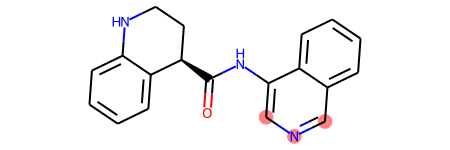

In [11]:
#Define where to link with a SMARTS pattern
linking_vectors = get_matching_atoms(frag_mol,"cn")
frag_mol

In [12]:
# Define a fragment to be linked "m2" and the topological distance between m1 and m2 with "dist="
m1 = frag_mol
m2 = Chem.MolFromSmiles('c1ccccc1') # Ph
link_list = list(link_mols(m1, m2, db_name=crem_db_file, dist=3, replace_ids_1=linking_vectors, replace_ids_2=None, return_mol=True))
mol_list = [RemoveHs(x[1]) for x in link_list]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,m1) for m in mol_list]
print(len(mol_list))

2


RDKit WARNING: [13:01:18] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [13:01:18] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [13:01:18] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [13:01:18] WARNING: not removing hydrogen atom with dummy atom neighbors


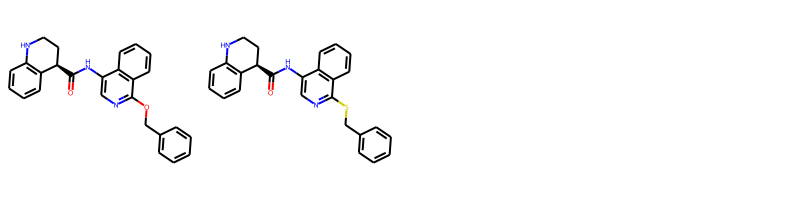

In [13]:
Draw.MolsToGridImage(mol_list[:16], molsPerRow=4)